# Facial Expression Recognition with SciKit Learn
Links
https://colab.research.google.com/drive/1mZimbXBAJlqgl-04phHxXRYku6EvgUOw
https://scikit-learn.org/stable/tutorial/basic/tutorial.html#introduction


In [1]:
# Import libraries 
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
import random

In [2]:
import cv2

In [3]:
# Load the dataset from the disk

def get_label_from_filename(filename):
  """ Given a filename of the format 'NM.NE2.93.tiff', return the label 'NE'."""
  index = filename.find('.')
  return filename[index+1:index+3]

rows=64
cols=64
channels=3
num_classes=7

emotion_to_int =  {"AN":0, "DI":1, "FE":2, "NE":3, "SA":4, "SU":5, "HA":6}
int_to_emotion =  {0:"AN", 1:"DI", 2:"FE", 3:"NE", 4:"SA", 5:"SU", 6:"HA"}
emotion_list = emotion_to_int.keys()  

img_data_list = []
labels_list = []

print("Reading the img files...")
data_path = './jaffedbase/'
for img in os.listdir(data_path):
  if "tiff" not in img: continue # Process only img files
  # Read the image
  input_img = cv2.imread(data_path + "/" + img)
  input_img_resize = cv2.resize(input_img,(rows,cols))
  img_data_list.append(input_img_resize)

  # Read the label
  emotion = get_label_from_filename(img)
  emotion_int = emotion_to_int[emotion] # convert to index
  labels_list.append(emotion_int)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255 # Normalize between [0-1]
img_data = img_data.reshape((len(img_data), -1)) # Flatten the images
labels = np.array(labels_list)

num_images = img_data.shape[0]

# Split the data into train and test set
train_size = int(num_images*0.8) # reserve 80% for training, 20% for testing
train_images = img_data[0:train_size]
train_labels = labels[0:train_size]
test_images = img_data[train_size:]
test_labels = labels[train_size:]


print("... finished with the input and labels as follows: ")
print("-- train_images.shape: ", train_images.shape)
print("-- train_labels.shape: ", train_labels.shape)
print("-- test_images.shape: ", test_images.shape)
print("-- test_labels.shape: ", test_labels.shape)
print("-- The number of images: ", num_images)

Reading the img files...
... finished with the input and labels as follows: 
-- train_images.shape:  (170, 12288)
-- train_labels.shape:  (170,)
-- test_images.shape:  (43, 12288)
-- test_labels.shape:  (43,)
-- The number of images:  213


In [58]:
sample = img_data_list[10]
sample.shape
print(sample[32,:-1,:3])

[[108 108 108]
 [100 100 100]
 [105 105 105]
 [104 104 104]
 [113 113 113]
 [109 109 109]
 [104 104 104]
 [107 107 107]
 [ 99  99  99]
 [ 95  95  95]
 [ 91  91  91]
 [ 87  87  87]
 [  5   5   5]
 [  2   2   2]
 [  4   4   4]
 [ 51  51  51]
 [ 79  79  79]
 [104 104 104]
 [101 101 101]
 [ 70  70  70]
 [ 30  30  30]
 [ 32  32  32]
 [123 123 123]
 [ 14  14  14]
 [  7   7   7]
 [  6   6   6]
 [138 138 138]
 [ 42  42  42]
 [203 203 203]
 [185 185 185]
 [165 165 165]
 [178 178 178]
 [200 200 200]
 [198 198 198]
 [210 210 210]
 [202 202 202]
 [133 133 133]
 [122 122 122]
 [ 35  35  35]
 [  6   6   6]
 [ 11  11  11]
 [166 166 166]
 [ 93  93  93]
 [ 92  92  92]
 [124 124 124]
 [157 157 157]
 [177 177 177]
 [173 173 173]
 [146 146 146]
 [119 119 119]
 [  7   7   7]
 [  4   4   4]
 [ 12  12  12]
 [ 42  42  42]
 [ 34  34  34]
 [147 147 147]
 [142 142 142]
 [141 141 141]
 [139 139 139]
 [133 133 133]
 [126 126 126]
 [130 130 130]
 [143 143 143]]


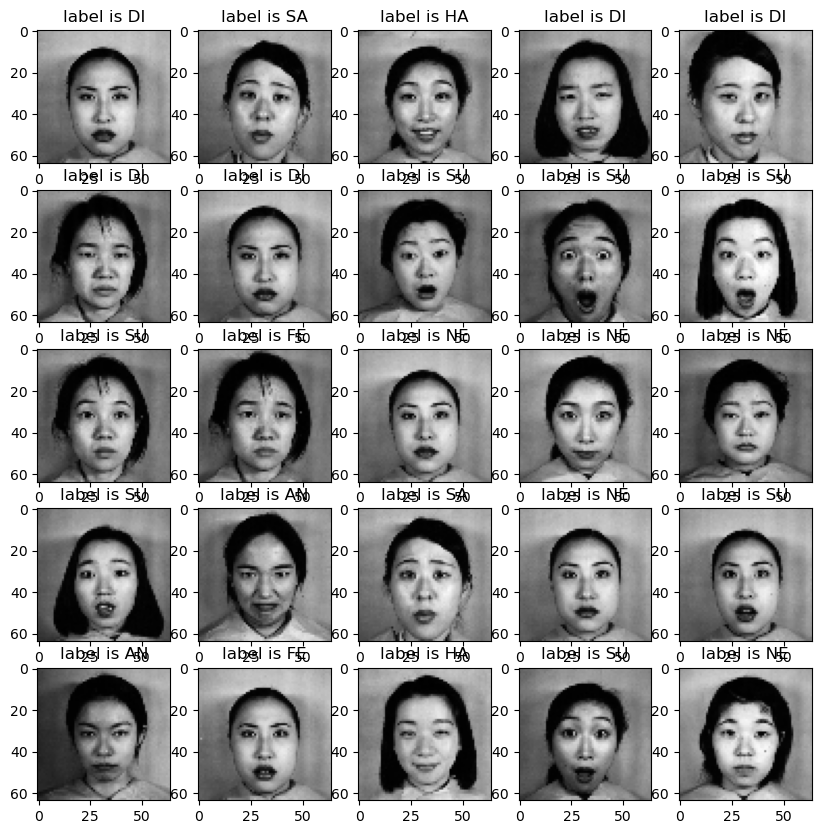

In [4]:
# Create an NxN display of samples
N = 5
fig, axs = plt.subplots(N, N)

for i in range(5):
  for j in range(5):
    index = random.randint(0, 213-1) # pick a random index
    img = img_data[index]
    img = img.reshape(cols, rows, channels)
    label = labels[index]
    axs[i, j].imshow(img)
    axs[i, j].set_title("label is " + int_to_emotion[label])

## CONFIGURE SVM FOR CLASSIFICATION

In [5]:
from sklearn import svm, metrics

# Create a classifier: a support vector classifier
# This is with RBF kernel
classifier = svm.SVC(gamma=0.001)

print("classifier: ", classifier)
# C: From the doc: "For larger values of C, a smaller margin will be accepted if the decision 
# .  function is better at classifying all training points correctly. A lower C will encourage 
#    a larger margin, therefore a simpler decision function, at the cost of training accuracy. 
#     In other words ``C`` behaves as a regularization parameter in the SVM."
# OVR: One-versus-rest (alternative: ovo -- One-versus-one)
# Kernel (RBF): Radial Basis Functions
# Probability (False): Estimate the probability for class membership from scores
# class_weight (None): Give more weight to some classess
# coef0: Constant r in the kernel definition (see above)
# 

classifier:  SVC(gamma=0.001)


In [6]:
# We learn the SVM model on the training data
classifier.fit(train_images, train_labels)

# Now predict on the test data
predicted = classifier.predict(test_images)
expected = test_labels

In [42]:
print(test_labels[42])

4


In [7]:
print(predicted)

[2 6 0 5 6 0 2 3 6 2 0 5 6 5 5 6 6 6 6 6 6 5 3 6 0 6 6 6 0 0 6 0 2 2 0 0 6
 6 0 6 0 3 3]


In [8]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.45      0.71      0.56         7
           1       0.00      0.00      0.00         8
           2       0.60      0.43      0.50         7
           3       0.25      0.17      0.20         6
           4       0.00      0.00      0.00         9
           5       0.40      0.67      0.50         3
           6       0.06      0.33      0.10         3

    accuracy                           0.28        43
   macro avg       0.25      0.33      0.26        43
weighted avg       0.24      0.28      0.24        43




/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


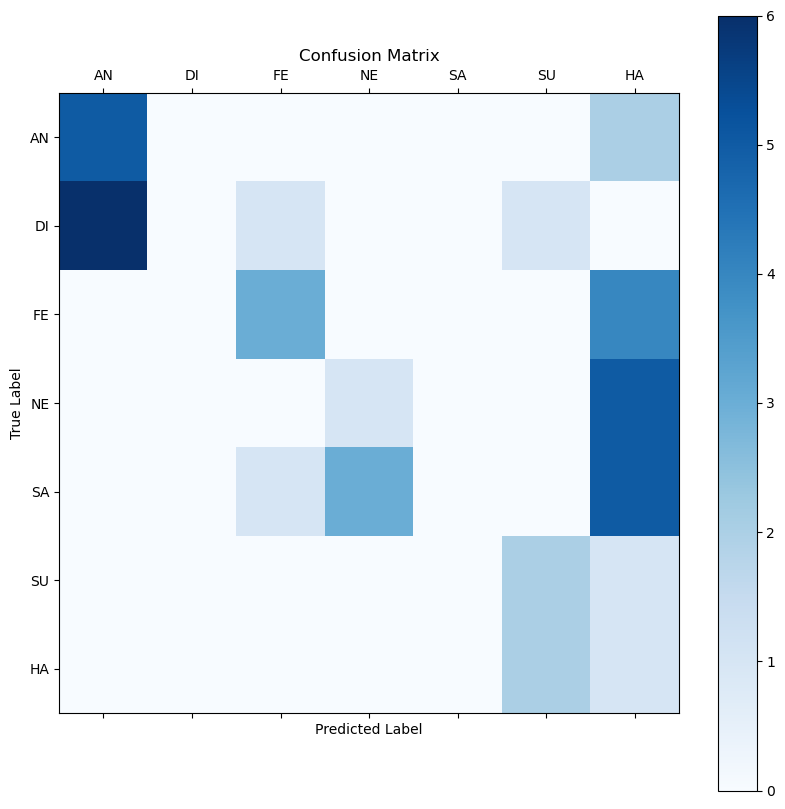

In [9]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predicted)
plt.matshow(cm, cmap="Blues")
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(ticks=range(0,7), labels=list(emotion_to_int.keys()))
plt.yticks(ticks=range(0,7), labels=list(emotion_to_int.keys()))
plt.show()

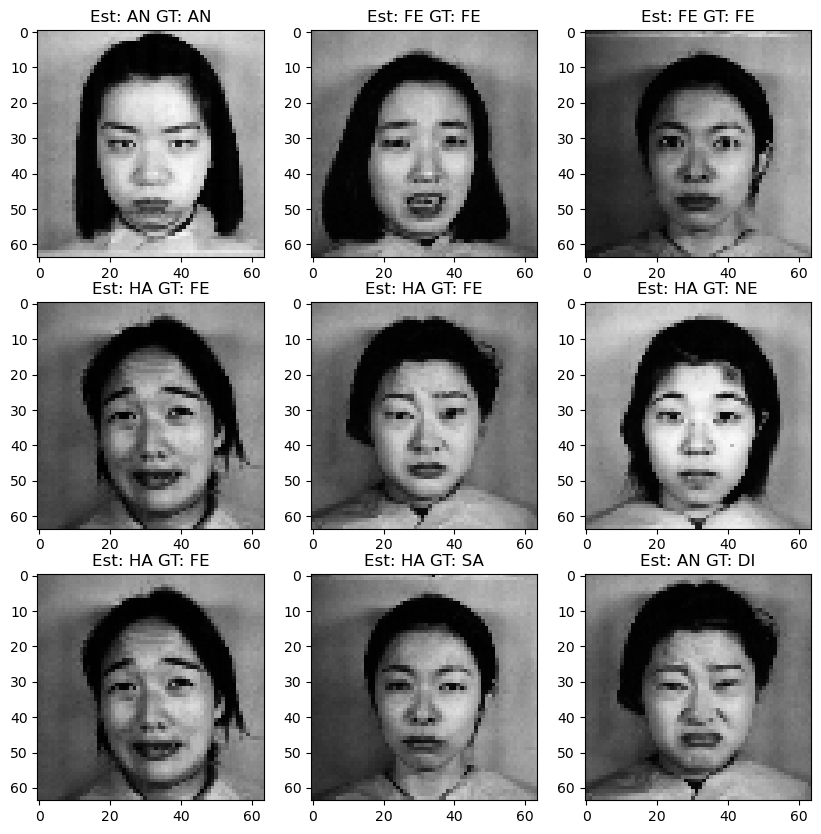

In [10]:
# Create an NxN display of samples
N = 3
fig, axs = plt.subplots(N, N)

for i in range(3):
  for j in range(3):
    index = random.randint(0, len(test_images)-1) # pick a random index
    img = test_images[index].reshape(cols, rows, channels)
    correct_label = test_labels[index]
    predicted_label = predicted[index]

    axs[i, j].imshow(img)
    axs[i, j].set_title("Est: " + int_to_emotion[predicted_label] + " GT: " + int_to_emotion[correct_label])

In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Specify the ranges to be searched for hyper-parameters
C_range = np.logspace(-2, 10, 5)
gamma_range = np.logspace(-9, 3, 5)
param_grid = dict(gamma=gamma_range, C=C_range)

# Do cross validation
cv = KFold() # default n_splits = 5
grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv)
grid.fit(train_images, train_labels)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

#This printed the following for me: 
# The best parameters are {'C': 10000.0, 'gamma': 0.001} with a score of 0.81

The best parameters are {'C': 10000000.0, 'gamma': 1e-06} with a score of 0.82


In [12]:
best_SVM = svm.SVC(C=10000000.0, gamma=1e-06)
best_SVM.fit(train_images, train_labels)

SVC(C=10000000.0, gamma=1e-06)

In [13]:
predicted = best_SVM.predict(test_images)
expected = test_labels

print("Classification report for classifier %s:\n%s\n"
      % (best_SVM, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=10000000.0, gamma=1e-06):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7
           3       0.60      1.00      0.75         6
           4       1.00      0.67      0.80         9
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         3

    accuracy                           0.91        43
   macro avg       0.94      0.90      0.91        43
weighted avg       0.94      0.91      0.91        43




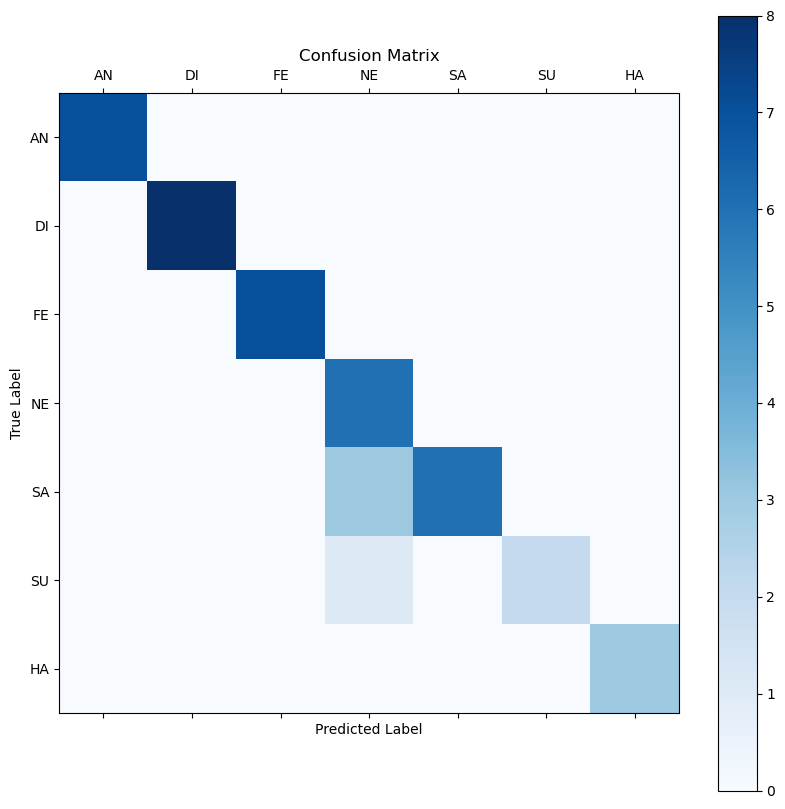

In [14]:
cm = confusion_matrix(test_labels, predicted)
plt.matshow(cm, cmap="Blues")
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(ticks=range(0,7), labels=list(emotion_to_int.keys()))
plt.yticks(ticks=range(0,7), labels=list(emotion_to_int.keys()))
plt.show()

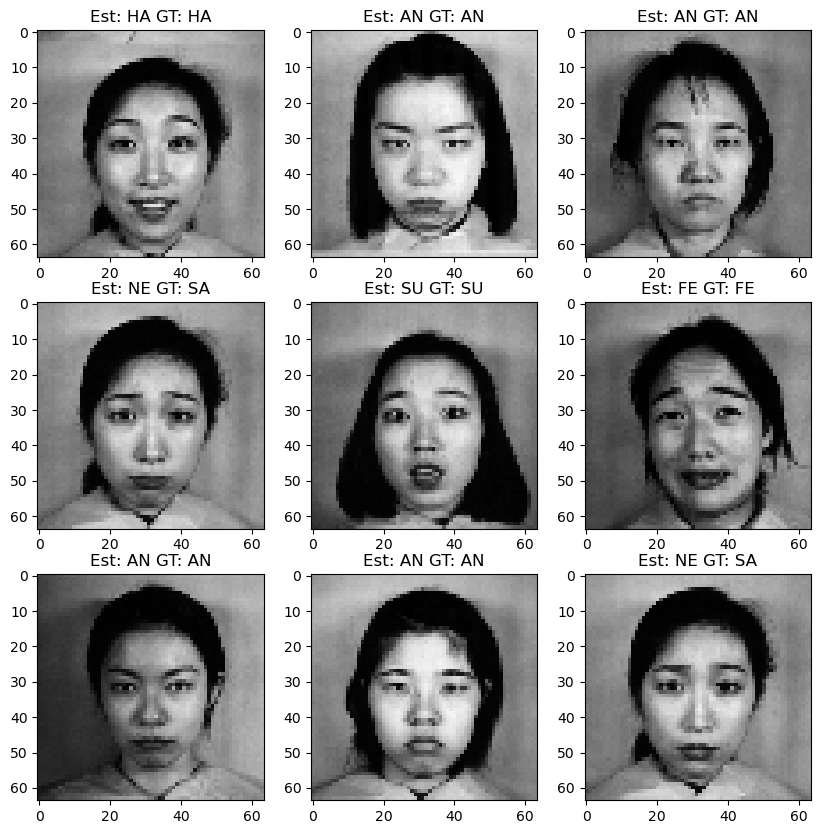

In [15]:
# Create an NxN display of samples
N = 3
fig, axs = plt.subplots(N, N)

for i in range(3):
  for j in range(3):
    index = random.randint(0, len(test_images)-1) # pick a random index
    img = test_images[index].reshape(cols, rows, channels)
    correct_label = test_labels[index]
    predicted_label = predicted[index]

    axs[i, j].imshow(img)
    axs[i, j].set_title("Est: " + int_to_emotion[predicted_label] + " GT: " + int_to_emotion[correct_label])

## FER with Multi Layer Preceptrons

In [16]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(1000, 200), random_state=1, verbose=True)

print(mlp_classifier)
# alpha: L2 penalty (regularization term) parameter.
# beta_1, beta_2: parameters for first-order and second-order moments of Adam
# loss: cross-entropy loss. 

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(1000, 200), random_state=1,
              solver='lbfgs', verbose=True)


In [17]:
# We learn the SVM model on the training data
mlp_classifier.fit(train_images, train_labels)

# Now predict on the test data
predicted = mlp_classifier.predict(test_images)
expected = test_labels

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =     12490607     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.



At iterate    0    f=  2.04766D+00    |proj g|=  1.72953D-01

At iterate    1    f=  1.92350D+00    |proj g|=  4.61765D-02

At iterate    2    f=  1.89644D+00    |proj g|=  5.52834D-02

At iterate    3    f=  1.85784D+00    |proj g|=  6.36846D-02

At iterate    4    f=  1.79055D+00    |proj g|=  5.27616D-02

At iterate    5    f=  1.70237D+00    |proj g|=  5.52032D-02

At iterate    6    f=  1.61209D+00    |proj g|=  3.23546D-02

At iterate    7    f=  1.51918D+00    |proj g|=  8.29844D-02

At iterate    8    f=  1.39707D+00    |proj g|=  2.18459D-01

At iterate    9    f=  1.31491D+00    |proj g|=  2.14119D-01

At iterate   10    f=  1.26459D+00    |proj g|=  1.97826D-01

At iterate   11    f=  1.18080D+00    |proj g|=  2.83841D-01

At iterate   12    f=  1.13409D+00    |proj g|=  1.61592D-01

At iterate   13    f=  1.11197D+00    |proj g|=  2.02208D-01

At iterate   14    f=  1.09202D+00    |proj g|=  1.47257D-01

At iterate   15    f=  1.06149D+00    |proj g|=  1.43786D-01

At iter

/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### 4.3.1 Quantitative Results

In [18]:
print("Classification report for classifier %s:\n%s\n"
      % (mlp_classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier MLPClassifier(alpha=1e-05, hidden_layer_sizes=(1000, 200), random_state=1,
              solver='lbfgs', verbose=True):
              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.75      0.86         8
           2       1.00      1.00      1.00         7
           3       0.67      1.00      0.80         6
           4       1.00      0.44      0.62         9
           5       1.00      0.67      0.80         3
           6       0.75      1.00      0.86         3

    accuracy                           0.81        43
   macro avg       0.86      0.84      0.82        43
weighted avg       0.88      0.81      0.80        43




### 4.3.2 Confusion Matrix

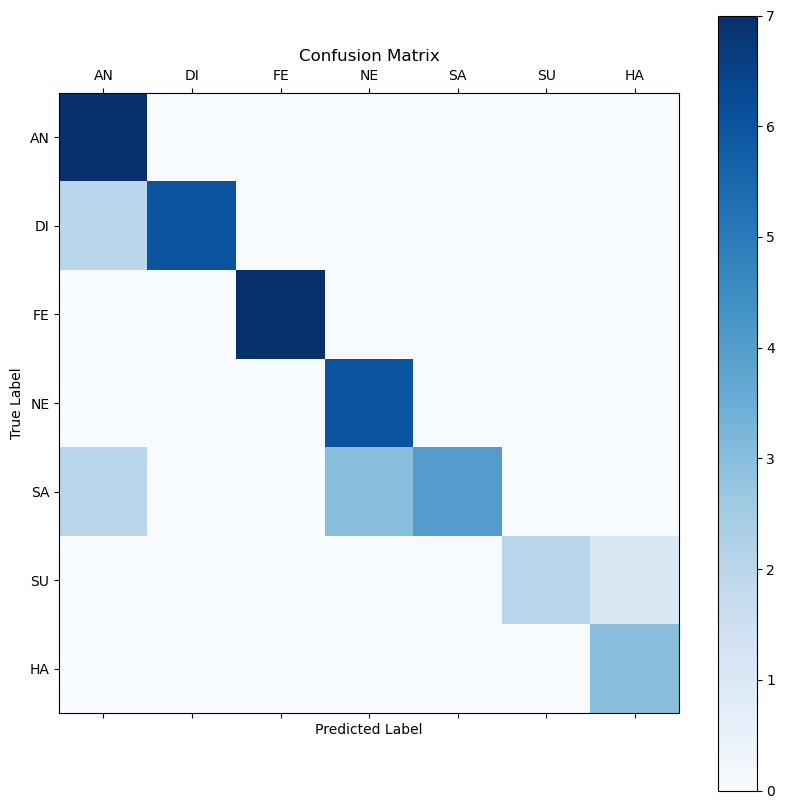

In [19]:
cm = confusion_matrix(test_labels, predicted)
plt.matshow(cm, cmap="Blues")
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(ticks=range(0,7), labels=list(emotion_to_int.keys()))
plt.yticks(ticks=range(0,7), labels=list(emotion_to_int.keys()))
plt.show()

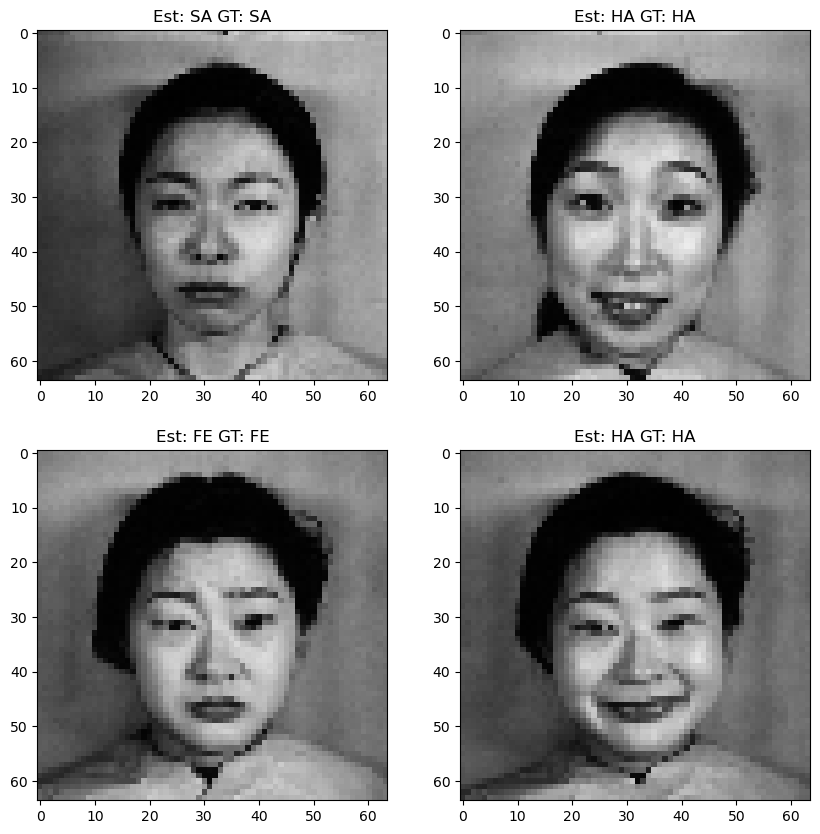

In [20]:
# Create an NxN display of samples
N = 2
fig, axs = plt.subplots(N, N)

for i in range(2):
  for j in range(2):
    index = random.randint(0, len(test_images)-1) # pick a random index
    img = test_images[index].reshape(cols, rows, channels)
    correct_label = test_labels[index]
    predicted_label = predicted[index]

    axs[i, j].imshow(img)
    axs[i, j].set_title("Est: " + int_to_emotion[predicted_label] + " GT: " + int_to_emotion[correct_label])

### MLP GridSearch

In [21]:
# parameter_space = {
#     #'hidden_layer_sizes': [(10,30,10),(20,)],  #try 100 nodes in 2 layers
#     'hidden_layer_sizes': [(2,10,20),(4,10,20)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }

# from sklearn.model_selection import GridSearchCV

# clf = GridSearchCV(mlp_classifier, parameter_space, n_jobs=-1, cv=5, verbose=10)

# clf.fit(train_images, train_labels)

# print("The best parameters are %s with a score of %0.2f"
#       % (clf.best_params_, clf.best_score_))

In [22]:
parameter_space = {
    #'hidden_layer_sizes': [(10,30,10),(20,)],  #try 100 nodes in 2 layers
    #'hidden_layer_sizes': [(256,),(128,128,),(64,128,64,),(64,64,64,64,)],          
    'hidden_layer_sizes': [(1000,200,),(200,800,200),(300, 300, 300, 300,),(200,200,200,200,200,200,)],
    'activation': ['tanh'],
    'solver': ['sgd'],
    'alpha': [0.0001],
    'learning_rate': ['adaptive'],
    'max_iter':[500],
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp_classifier, parameter_space, n_jobs=-1, cv=3, verbose=10)

clf.fit(train_images, train_labels)

print("The best parameters are %s with a score of %0.2f"
      % (clf.best_params_, clf.best_score_))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 2/4] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 800, 200), learning_rate=adaptive, max_iter=500, solver=sgd
Iteration 1, loss = 2.01987024
Iteration 2, loss = 1.96338436
Iteration 3, loss = 1.94609966
Iteration 4, loss = 1.94051265
Iteration 5, loss = 1.93246560
Iteration 6, loss = 1.91924271
Iteration 7, loss = 1.90372155
Iteration 8, loss = 1.88858632
Iteration 9, loss = 1.87409924
Iteration 10, loss = 1.85939207
Iteration 11, loss = 1.84413031
Iteration 12, loss = 1.82860361
Iteration 13, loss = 1.81312661
Iteration 14, loss = 1.79776736
Iteration 15, loss = 1.78243282
Iteration 16, loss = 1.76702995
Iteration 17, loss = 1.75154269
Iteration 18, loss = 1.73602032
Iteration 19, loss = 1.72053022
Iteration 20, loss = 1.70511574
Iteration 21, loss = 1.68978188
Iteration 22, loss = 1.67450702
Iteration 23, loss = 1.65926620
Iteration 24, loss = 1.64404482
Iteration 25, loss = 1.62884072
Iteration 26,

/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 496, loss = 0.04355891
Iteration 497, loss = 0.04340673
Iteration 498, loss = 0.04325546
Iteration 499, loss = 0.04310507
Iteration 500, loss = 0.04295561
[CV 1/3; 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 800, 200), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.754 total time=  32.2s
[CV 2/3; 2/4] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 800, 200), learning_rate=adaptive, max_iter=500, solver=sgd
Iteration 1, loss = 2.05444638
Iteration 2, loss = 1.98186910
Iteration 3, loss = 1.96239727
Iteration 4, loss = 1.95713636
Iteration 5, loss = 1.94909579
Iteration 6, loss = 1.93465314
Iteration 7, loss = 1.91703491
Iteration 8, loss = 1.89997207
Iteration 9, loss = 1.88432277
Iteration 10, loss = 1.86898026
Iteration 11, loss = 1.85317877
Iteration 12, loss = 1.83705833
Iteration 13, loss = 1.82097827
Iteration 14, loss = 1.80505863
Iteration 15, loss = 1.78920799
Iteration 16, loss = 1.77330091
Iteration 17, loss = 1.757284

/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 1/4] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(1000, 200), learning_rate=adaptive, max_iter=500, solver=sgd
Iteration 1, loss = 1.99476477
Iteration 2, loss = 1.94395889
Iteration 3, loss = 1.93204419
Iteration 4, loss = 1.91117525
Iteration 5, loss = 1.88393416
Iteration 6, loss = 1.85757300
Iteration 7, loss = 1.83141207
Iteration 8, loss = 1.80453921
Iteration 9, loss = 1.77735915
Iteration 10, loss = 1.75043181
Iteration 11, loss = 1.72396973
Iteration 12, loss = 1.69804424
Iteration 13, loss = 1.67270542
Iteration 14, loss = 1.64796691
Iteration 15, loss = 1.62380114
Iteration 16, loss = 1.60015912
Iteration 17, loss = 1.57698799
Iteration 18, loss = 1.55423754
Iteration 19, loss = 1.53186254
Iteration 20, loss = 1.50982430
Iteration 21, loss = 1.48809084
Iteration 22, loss = 1.46663672
Iteration 23, loss = 1.44544160
Iteration 24, loss = 1.42449075
Iteration 25, loss = 1.40377321
Iteration 26, loss = 1.38328334
Iteration 27, loss = 1.36301927
Iteration 28,

/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 476, loss = 0.04843710
Iteration 477, loss = 0.04825203
Iteration 478, loss = 0.04806814
Iteration 479, loss = 0.04788544
Iteration 480, loss = 0.04770393
Iteration 481, loss = 0.04752358
Iteration 482, loss = 0.04734436
Iteration 483, loss = 0.04716632
Iteration 484, loss = 0.04698936
Iteration 485, loss = 0.04681360
Iteration 486, loss = 0.04663888
Iteration 487, loss = 0.04646531
Iteration 488, loss = 0.04629283
Iteration 489, loss = 0.04612144
Iteration 490, loss = 0.04595110
Iteration 491, loss = 0.04578185
Iteration 492, loss = 0.04561364
Iteration 493, loss = 0.04544649
Iteration 494, loss = 0.04528041
Iteration 495, loss = 0.04511532
Iteration 496, loss = 0.04495124
Iteration 497, loss = 0.04478822
Iteration 498, loss = 0.04462620
Iteration 499, loss = 0.04446517
Iteration 500, loss = 0.04430511
[CV 3/3; 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 800, 200), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.839 total time=  32.1s
[CV 1/3;

/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 248, loss = 0.15311848
Iteration 249, loss = 0.15218680
Iteration 250, loss = 0.15126416
Iteration 251, loss = 0.15035041
Iteration 252, loss = 0.14944555
Iteration 253, loss = 0.14854939
Iteration 254, loss = 0.14766185
Iteration 255, loss = 0.14678282
Iteration 256, loss = 0.14591220
Iteration 257, loss = 0.14504981
Iteration 258, loss = 0.14419570
Iteration 259, loss = 0.14334962
Iteration 260, loss = 0.14251150
Iteration 261, loss = 0.14168131
Iteration 262, loss = 0.14085889
Iteration 263, loss = 0.14004417
Iteration 264, loss = 0.13923704
Iteration 265, loss = 0.13843742
Iteration 266, loss = 0.13764522
Iteration 267, loss = 0.13686034
Iteration 268, loss = 0.13608270
Iteration 269, loss = 0.13531221
Iteration 270, loss = 0.13454879
Iteration 271, loss = 0.13379230
Iteration 272, loss = 0.13304277
Iteration 273, loss = 0.13229998
Iteration 274, loss = 0.13156394
Iteration 275, loss = 0.13083453
Iteration 276, loss = 0.13011175
Iteration 277, loss = 0.12939540
Iteration 

/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 248, loss = 0.14697503
Iteration 249, loss = 0.14610629
Iteration 250, loss = 0.14524598
Iteration 251, loss = 0.14439391
Iteration 252, loss = 0.14355000
Iteration 253, loss = 0.14271415
Iteration 254, loss = 0.14188633
Iteration 255, loss = 0.14106630
Iteration 256, loss = 0.14025409
Iteration 257, loss = 0.13944948
Iteration 258, loss = 0.13865252
Iteration 259, loss = 0.13786299
Iteration 260, loss = 0.13708090
Iteration 261, loss = 0.13630603
Iteration 262, loss = 0.13553843
Iteration 263, loss = 0.13477791
Iteration 264, loss = 0.13402442
Iteration 265, loss = 0.13327791
Iteration 266, loss = 0.13253820
Iteration 267, loss = 0.13180532
Iteration 268, loss = 0.13107912
Iteration 269, loss = 0.13035952
Iteration 270, loss = 0.12964648
Iteration 271, loss = 0.12893989
Iteration 272, loss = 0.12823966
Iteration 273, loss = 0.12754573
Iteration 274, loss = 0.12685804
Iteration 275, loss = 0.12617650
Iteration 276, loss = 0.12550102
Iteration 277, loss = 0.12483155
Iteration 

/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 496, loss = 0.05619949
Iteration 497, loss = 0.05603451
Iteration 498, loss = 0.05587033
Iteration 499, loss = 0.05570703
Iteration 500, loss = 0.05554456
[CV 2/3; 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(1000, 200), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.772 total time= 2.7min
[CV 1/3; 4/4] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 200, 200, 200, 200, 200), learning_rate=adaptive, max_iter=500, solver=sgd
Iteration 1, loss = 2.02148549
Iteration 2, loss = 1.97368024
Iteration 3, loss = 1.93740186
Iteration 4, loss = 1.91966169
Iteration 5, loss = 1.91426332
Iteration 6, loss = 1.91128705
Iteration 7, loss = 1.90435943
Iteration 8, loss = 1.89231106
Iteration 9, loss = 1.87732760
Iteration 10, loss = 1.86219899
Iteration 11, loss = 1.84844960
Iteration 12, loss = 1.83604583
Iteration 13, loss = 1.82411413
Iteration 14, loss = 1.81174857
Iteration 15, loss = 1.79847046
Iteration 16, loss = 1.78432246
Iteration 17, loss

/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 238, loss = 0.07514955
Iteration 239, loss = 0.07445879
Iteration 240, loss = 0.07377838
Iteration 241, loss = 0.07310810
Iteration 242, loss = 0.07244781
Iteration 243, loss = 0.07179729
Iteration 244, loss = 0.07115637
Iteration 245, loss = 0.07052487
Iteration 246, loss = 0.06990256
Iteration 247, loss = 0.06928932
Iteration 248, loss = 0.06868495
Iteration 249, loss = 0.06808932
Iteration 250, loss = 0.06750222
Iteration 251, loss = 0.06692350
Iteration 252, loss = 0.06635305
Iteration 253, loss = 0.06579067
Iteration 254, loss = 0.06523624
Iteration 255, loss = 0.06468958
Iteration 256, loss = 0.06415057
Iteration 257, loss = 0.06361906
Iteration 258, loss = 0.06309493
Iteration 259, loss = 0.06257806
Iteration 260, loss = 0.06206824
Iteration 261, loss = 0.06156542
Iteration 262, loss = 0.06106946
Iteration 263, loss = 0.06058020
Iteration 264, loss = 0.06009758
Iteration 265, loss = 0.05962143
Iteration 266, loss = 0.05915169
Iteration 267, loss = 0.05868820
Iteration 

/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 449, loss = 0.03261946
Iteration 450, loss = 0.03249549
Iteration 451, loss = 0.03237236
Iteration 452, loss = 0.03225005
Iteration 453, loss = 0.03212856
Iteration 454, loss = 0.03200789
Iteration 455, loss = 0.03188802
Iteration 456, loss = 0.03176894
Iteration 457, loss = 0.03165066
Iteration 458, loss = 0.03153315
Iteration 459, loss = 0.03141642
Iteration 460, loss = 0.03130049
Iteration 461, loss = 0.03118529
Iteration 462, loss = 0.03107083
Iteration 463, loss = 0.03095715
Iteration 464, loss = 0.03084420
Iteration 465, loss = 0.03073198
Iteration 466, loss = 0.03062048
Iteration 467, loss = 0.03050973
Iteration 468, loss = 0.03039967
Iteration 469, loss = 0.03029032
Iteration 470, loss = 0.03018168
Iteration 471, loss = 0.03007373
Iteration 472, loss = 0.02996647
Iteration 473, loss = 0.02985988
Iteration 474, loss = 0.02975397
Iteration 475, loss = 0.02964873
Iteration 476, loss = 0.02954416
Iteration 477, loss = 0.02944025
Iteration 478, loss = 0.02933700
Iteration 

/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 183, loss = 0.21623173
Iteration 184, loss = 0.21545236
Iteration 185, loss = 0.21468742
Iteration 186, loss = 0.21393595
Iteration 187, loss = 0.21319709
Iteration 188, loss = 0.21246996
Iteration 189, loss = 0.21175388
Iteration 190, loss = 0.21104825
Iteration 191, loss = 0.21035229
Iteration 192, loss = 0.20966552
Iteration 193, loss = 0.20898732
Iteration 194, loss = 0.20831726
Iteration 195, loss = 0.20765483
Iteration 196, loss = 0.20699953
Iteration 197, loss = 0.20635102
Iteration 198, loss = 0.20570875
Iteration 199, loss = 0.20507243
Iteration 200, loss = 0.20444177
Iteration 201, loss = 0.20381637
Iteration 202, loss = 0.20319591
Iteration 203, loss = 0.20258011
Iteration 204, loss = 0.20196876
Iteration 205, loss = 0.20136162
Iteration 206, loss = 0.20075849
Iteration 207, loss = 0.20015927
Iteration 208, loss = 0.19956368
Iteration 209, loss = 0.19897155
Iteration 210, loss = 0.19838290
Iteration 211, loss = 0.19779748
Iteration 212, loss = 0.19721531
Iteration 

/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.03047065
Iteration 2, loss = 1.98418411
Iteration 3, loss = 1.95011572
Iteration 4, loss = 1.93410566
Iteration 5, loss = 1.92950379
Iteration 6, loss = 1.92729431
Iteration 7, loss = 1.92179756
Iteration 8, loss = 1.91173609
Iteration 9, loss = 1.89888029
Iteration 10, loss = 1.88576079
Iteration 11, loss = 1.87389250
Iteration 12, loss = 1.86335137
Iteration 13, loss = 1.85339259
Iteration 14, loss = 1.84321300
Iteration 15, loss = 1.83236041
Iteration 16, loss = 1.82080377
Iteration 17, loss = 1.80880497
Iteration 18, loss = 1.79668573
Iteration 19, loss = 1.78460992
Iteration 20, loss = 1.77252317
Iteration 21, loss = 1.76027629
Iteration 22, loss = 1.74778814
Iteration 23, loss = 1.73509301
Iteration 24, loss = 1.72226971
Iteration 25, loss = 1.70936060
Iteration 26, loss = 1.69635922
Iteration 27, loss = 1.68325084
Iteration 28, loss = 1.67004212
Iteration 29, loss = 1.65675136
Iteration 30, loss = 1.64338898
Iteration 31, loss = 1.62995245
Iteration 32, los

/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
from sklearn.neural_network import MLPClassifier

#mlp_classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(1000, 200), random_state=1, verbose=True)

print(mlp_classifier)
# alpha: L2 penalty (regularization term) parameter.
# beta_1, beta_2: parameters for first-order and second-order moments of Adam
# loss: cross-entropy loss. 

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(1000, 200), random_state=1,
              solver='lbfgs', verbose=True)


In [24]:
print("The best parameters are %s with a score of %0.2f"
      % (clf.best_params_, clf.best_score_))

The best parameters are {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 200, 200, 200, 200, 200), 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'sgd'} with a score of 0.79


In [25]:
clf_best = clf.fit(train_images, train_labels)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Iteration 431, loss = 0.11278728
Iteration 432, loss = 0.11253698
Iteration 433, loss = 0.11228756
Iteration 434, loss = 0.11203897
Iteration 435, loss = 0.11179127
Iteration 436, loss = 0.11154440
Iteration 437, loss = 0.11129838
Iteration 438, loss = 0.11105321
Iteration 439, loss = 0.11080888
Iteration 440, loss = 0.11056538
Iteration 441, loss = 0.11032271
Iteration 442, loss = 0.11008085
Iteration 443, loss = 0.10983984
Iteration 444, loss = 0.10959966
Iteration 445, loss = 0.10936030
Iteration 446, loss = 0.10912174
Iteration 447, loss = 0.10888402
Iteration 448, loss = 0.10864706
Iteration 449, loss = 0.10841094
Iteration 450, loss = 0.10817560
Iteration 451, loss = 0.10794107
Iteration 452, loss = 0.10770733
Iteration 453, loss = 0.10747439
Iteration 454, loss = 0.10724226
Iteration 455, loss = 0.10701084
Iteration 456, loss = 0.10678029
Iteration 457, loss = 0.10655046
Iteration 458, loss = 0.10632142
Iteration 459, l

/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 420, loss = 0.05846511
Iteration 421, loss = 0.05821545
Iteration 422, loss = 0.05796755
Iteration 423, loss = 0.05772142
Iteration 424, loss = 0.05747706
Iteration 425, loss = 0.05723436
Iteration 426, loss = 0.05699338
Iteration 427, loss = 0.05675408
Iteration 428, loss = 0.05651646
Iteration 429, loss = 0.05628050
Iteration 430, loss = 0.05604618
Iteration 431, loss = 0.05581346
Iteration 432, loss = 0.05558237
Iteration 433, loss = 0.05535286
Iteration 434, loss = 0.05512494
Iteration 435, loss = 0.05489860
Iteration 436, loss = 0.05467377
Iteration 437, loss = 0.05445050
Iteration 438, loss = 0.05422873
Iteration 439, loss = 0.05400850
Iteration 440, loss = 0.05378976
Iteration 441, loss = 0.05357247
Iteration 442, loss = 0.05335663
Iteration 443, loss = 0.05314229
Iteration 444, loss = 0.05292938
Iteration 445, loss = 0.05271790
Iteration 446, loss = 0.05250779
Iteration 447, loss = 0.05229912
Iteration 448, loss = 0.05209186
Iteration 449, loss = 0.05188594
Iteration 

/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 483, loss = 0.02642943
Iteration 484, loss = 0.02635104
Iteration 485, loss = 0.02627893
Iteration 486, loss = 0.02621236
Iteration 487, loss = 0.02615085
Iteration 488, loss = 0.02609384
Iteration 489, loss = 0.02604088
Iteration 490, loss = 0.02599155
Iteration 491, loss = 0.02594550
Iteration 492, loss = 0.02590237
Iteration 493, loss = 0.02586190
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 494, loss = 0.02582380
Iteration 495, loss = 0.02579047
Iteration 496, loss = 0.02576014
Iteration 497, loss = 0.02573254
Iteration 498, loss = 0.02570735
Iteration 499, loss = 0.02568438
Iteration 500, loss = 0.02566339
[CV 3/3; 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(300, 300, 300, 300), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.839 total time=  36.0s
[CV 3/

/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 400, loss = 0.06700935
Iteration 401, loss = 0.06669140
Iteration 402, loss = 0.06637593
Iteration 403, loss = 0.06606291
Iteration 404, loss = 0.06575232
Iteration 405, loss = 0.06544411
Iteration 406, loss = 0.06513826
Iteration 407, loss = 0.06483478
Iteration 408, loss = 0.06453362
Iteration 409, loss = 0.06423477
Iteration 410, loss = 0.06393820
Iteration 411, loss = 0.06364385
Iteration 412, loss = 0.06335176
Iteration 413, loss = 0.06306187
Iteration 414, loss = 0.06277418
Iteration 415, loss = 0.06248863
Iteration 416, loss = 0.06220522
Iteration 417, loss = 0.06192396
Iteration 418, loss = 0.06164480
Iteration 419, loss = 0.06136768
Iteration 420, loss = 0.06109269
Iteration 421, loss = 0.06081968
Iteration 422, loss = 0.06054866
Iteration 423, loss = 0.06027970
Iteration 424, loss = 0.06001267
Iteration 425, loss = 0.05974763
Iteration 426, loss = 0.05948455
Iteration 427, loss = 0.05922335
Iteration 428, loss = 0.05896408
Iteration 429, loss = 0.05870668
Iteration 

/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 390, loss = 0.03863948
Iteration 391, loss = 0.03846461
Iteration 392, loss = 0.03829114
Iteration 393, loss = 0.03811901
Iteration 394, loss = 0.03794824
Iteration 395, loss = 0.03777879
Iteration 396, loss = 0.03761067
Iteration 397, loss = 0.03744384
Iteration 398, loss = 0.03727831
Iteration 399, loss = 0.03711406
Iteration 400, loss = 0.03695105
Iteration 401, loss = 0.03678931
Iteration 402, loss = 0.03662881
Iteration 403, loss = 0.03646953
Iteration 404, loss = 0.03631144
Iteration 405, loss = 0.03615456
Iteration 406, loss = 0.03599888
Iteration 407, loss = 0.03584436
Iteration 408, loss = 0.03569099
Iteration 409, loss = 0.03553878
Iteration 410, loss = 0.03538772
Iteration 411, loss = 0.03523776
Iteration 412, loss = 0.03508891
Iteration 413, loss = 0.03494118
Iteration 414, loss = 0.03479450
Iteration 415, loss = 0.03464896
Iteration 416, loss = 0.03450445
Iteration 417, loss = 0.03436101
Iteration 418, loss = 0.03421860
Iteration 419, loss = 0.03407724
Iteration 

/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 125, loss = 0.43171262
Iteration 126, loss = 0.42526695
Iteration 127, loss = 0.41892890
Iteration 128, loss = 0.41269686
Iteration 129, loss = 0.40656977
Iteration 130, loss = 0.40054598
Iteration 131, loss = 0.39462444
Iteration 132, loss = 0.38880371
Iteration 133, loss = 0.38308243
Iteration 134, loss = 0.37745935
Iteration 135, loss = 0.37193302
Iteration 136, loss = 0.36650223
Iteration 137, loss = 0.36116549
Iteration 138, loss = 0.35592156
Iteration 139, loss = 0.35076900
Iteration 140, loss = 0.34570645
Iteration 141, loss = 0.34073261
Iteration 142, loss = 0.33584607
Iteration 143, loss = 0.33104538
Iteration 144, loss = 0.32632932
Iteration 145, loss = 0.32169627
Iteration 146, loss = 0.31714506
Iteration 147, loss = 0.31267439
Iteration 148, loss = 0.30828271
Iteration 149, loss = 0.30396872
Iteration 150, loss = 0.29973118
Iteration 151, loss = 0.29556866
Iteration 152, loss = 0.29147986
Iteration 153, loss = 0.28746345
Iteration 154, loss = 0.28351826
Iteration 

/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 373, loss = 0.04527182
Iteration 374, loss = 0.04505129
Iteration 375, loss = 0.04483261
Iteration 376, loss = 0.04461575
Iteration 377, loss = 0.04440074
Iteration 378, loss = 0.04418752
Iteration 379, loss = 0.04397606
Iteration 380, loss = 0.04376637
Iteration 381, loss = 0.04355843
Iteration 382, loss = 0.04335219
Iteration 383, loss = 0.04314765
Iteration 384, loss = 0.04294481
Iteration 385, loss = 0.04274361
Iteration 386, loss = 0.04254406
Iteration 387, loss = 0.04234612
Iteration 388, loss = 0.04214980
Iteration 389, loss = 0.04195506
Iteration 390, loss = 0.04176189
Iteration 391, loss = 0.04157027
Iteration 392, loss = 0.04138019
Iteration 393, loss = 0.04119162
Iteration 394, loss = 0.04100456
Iteration 395, loss = 0.04081898
Iteration 396, loss = 0.04063485
Iteration 397, loss = 0.04045219
Iteration 398, loss = 0.04027097
Iteration 399, loss = 0.04009115
Iteration 400, loss = 0.03991277
Iteration 401, loss = 0.03973573
Iteration 402, loss = 0.03956011
Iteration 

/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 208, loss = 0.14535448
Iteration 209, loss = 0.14372412
Iteration 210, loss = 0.14212107
Iteration 211, loss = 0.14054490
Iteration 212, loss = 0.13899497
Iteration 213, loss = 0.13747075
Iteration 214, loss = 0.13597180
Iteration 215, loss = 0.13449754
Iteration 216, loss = 0.13304747
Iteration 217, loss = 0.13162117
Iteration 218, loss = 0.13021809
Iteration 219, loss = 0.12883785
Iteration 220, loss = 0.12747990
Iteration 221, loss = 0.12614384
Iteration 222, loss = 0.12482923
Iteration 223, loss = 0.12353563
Iteration 224, loss = 0.12226269
Iteration 225, loss = 0.12100991
Iteration 226, loss = 0.11977691
Iteration 227, loss = 0.11856334
Iteration 228, loss = 0.11736884
Iteration 229, loss = 0.11619293
Iteration 230, loss = 0.11503535
Iteration 231, loss = 0.11389569
Iteration 232, loss = 0.11277364
Iteration 233, loss = 0.11166885
Iteration 234, loss = 0.11058088
Iteration 235, loss = 0.10950956
Iteration 236, loss = 0.10845447
Iteration 237, loss = 0.10741536
Iteration 

/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.03047065
Iteration 2, loss = 1.98418411
Iteration 3, loss = 1.95011572
Iteration 4, loss = 1.93410566
Iteration 5, loss = 1.92950379
Iteration 6, loss = 1.92729431
Iteration 7, loss = 1.92179756
Iteration 8, loss = 1.91173609
Iteration 9, loss = 1.89888029
Iteration 10, loss = 1.88576079
Iteration 11, loss = 1.87389250
Iteration 12, loss = 1.86335137
Iteration 13, loss = 1.85339259
Iteration 14, loss = 1.84321300
Iteration 15, loss = 1.83236041
Iteration 16, loss = 1.82080377
Iteration 17, loss = 1.80880497
Iteration 18, loss = 1.79668573
Iteration 19, loss = 1.78460992
Iteration 20, loss = 1.77252317
Iteration 21, loss = 1.76027629
Iteration 22, loss = 1.74778814
Iteration 23, loss = 1.73509301
Iteration 24, loss = 1.72226971
Iteration 25, loss = 1.70936060
Iteration 26, loss = 1.69635922
Iteration 27, loss = 1.68325084
Iteration 28, loss = 1.67004212
Iteration 29, loss = 1.65675136
Iteration 30, loss = 1.64338898
Iteration 31, loss = 1.62995245
Iteration 32, los

/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
print(clf_best)

GridSearchCV(cv=3,
             estimator=MLPClassifier(alpha=1e-05,
                                     hidden_layer_sizes=(1000, 200),
                                     random_state=1, solver='lbfgs',
                                     verbose=True),
             n_jobs=-1,
             param_grid={'activation': ['tanh'], 'alpha': [0.0001],
                         'hidden_layer_sizes': [(1000, 200), (200, 800, 200),
                                                (300, 300, 300, 300),
                                                (200, 200, 200, 200, 200, 200)],
                         'learning_rate': ['adaptive'], 'max_iter': [500],
                         'solver': ['sgd']},
             verbose=10)


In [27]:
print(mlp_classifier)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(1000, 200), random_state=1,
              solver='lbfgs', verbose=True)


In [28]:
print(clf_best.best_params_)

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 200, 200, 200, 200, 200), 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'sgd'}


In [29]:
print("Classification report for classifier %s:\n%s\n"
      % (clf_best, metrics.classification_report(expected, predicted)))

Classification report for classifier GridSearchCV(cv=3,
             estimator=MLPClassifier(alpha=1e-05,
                                     hidden_layer_sizes=(1000, 200),
                                     random_state=1, solver='lbfgs',
                                     verbose=True),
             n_jobs=-1,
             param_grid={'activation': ['tanh'], 'alpha': [0.0001],
                         'hidden_layer_sizes': [(1000, 200), (200, 800, 200),
                                                (300, 300, 300, 300),
                                                (200, 200, 200, 200, 200, 200)],
                         'learning_rate': ['adaptive'], 'max_iter': [500],
                         'solver': ['sgd']},
             verbose=10):
              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.75      0.86         8
           2       1.00      1.00      1.00         7
           3       0

In [30]:
# We learn the SVM model on the training data
#classifier.fit(train_images, train_labels)

# Now predict on the test data
predicted = clf.predict(test_images)
expected = test_labels

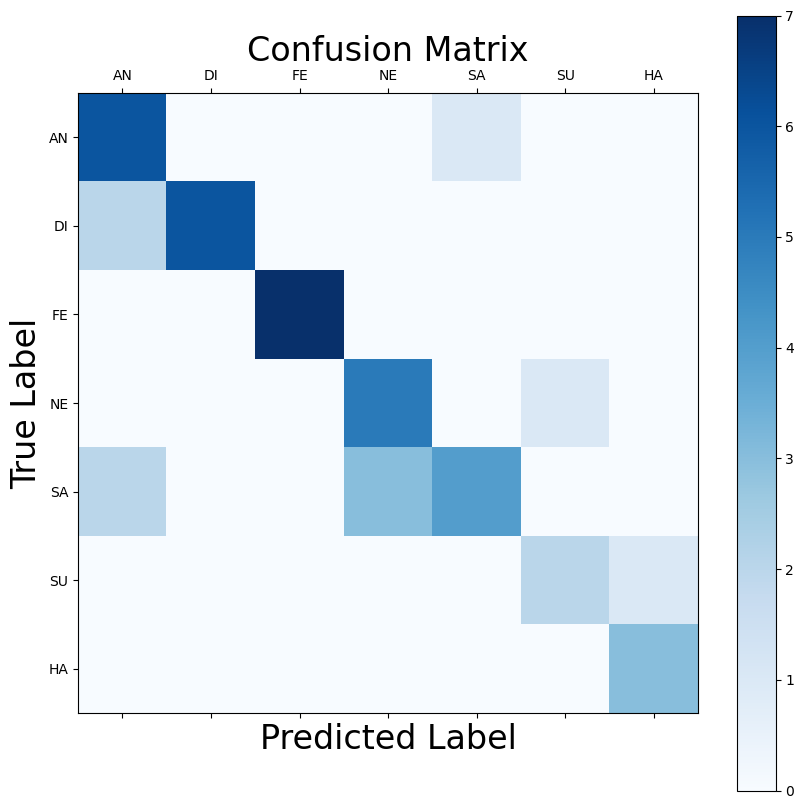

In [31]:
cm = confusion_matrix(test_labels, predicted)

plt.matshow(cm, cmap="Blues" )
plt.title('Confusion Matrix', fontsize=24)
plt.colorbar()
plt.ylabel('True Label', fontsize=24)
plt.xlabel('Predicted Label', fontsize=24)
plt.xticks(ticks=range(0,7), labels=list(emotion_to_int.keys()))
plt.yticks(ticks=range(0,7), labels=list(emotion_to_int.keys()))
plt.show()

In [32]:
print(test_labels)

[2 3 1 5 0 0 2 4 2 1 1 6 2 6 5 2 3 6 2 3 3 1 3 4 1 4 4 4 1 0 4 1 2 4 0 0 3
 5 1 0 0 4 4]


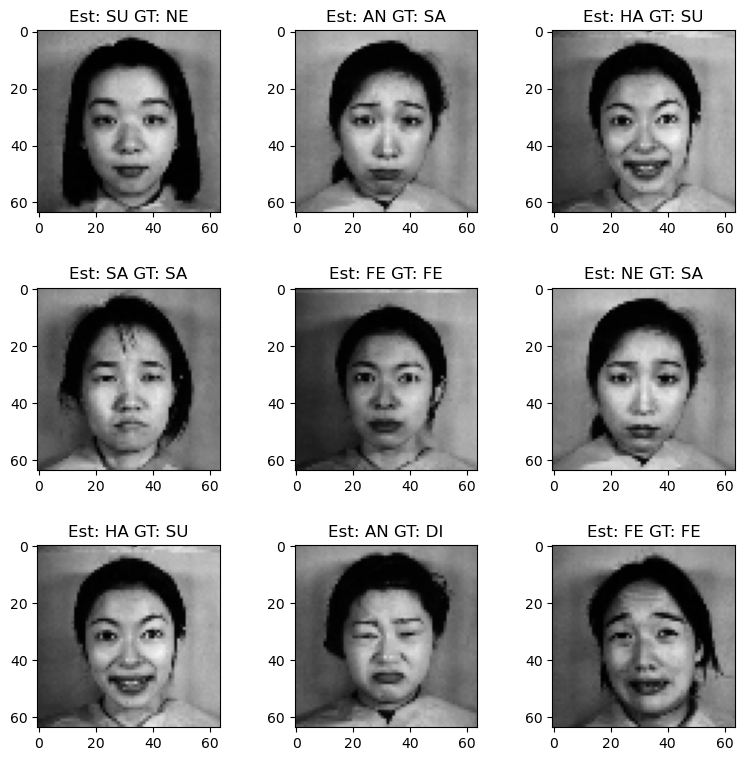

In [33]:
# Create an NxN display of samples
N = 3
fig, axs = plt.subplots(N, N, figsize=(8,8))
fig.tight_layout(pad=2.0)

for i in range(3):
  for j in range(3):
    index = random.randint(0, len(test_images)-1) # pick a random index
    img = test_images[index].reshape(cols, rows, channels)
    correct_label = test_labels[index]
    predicted_label = predicted[index]

    axs[i, j].imshow(img)
    axs[i, j].set_title("Est: " + int_to_emotion[predicted_label] + " GT: " + int_to_emotion[correct_label], fontsize=12)

/home/sgc/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


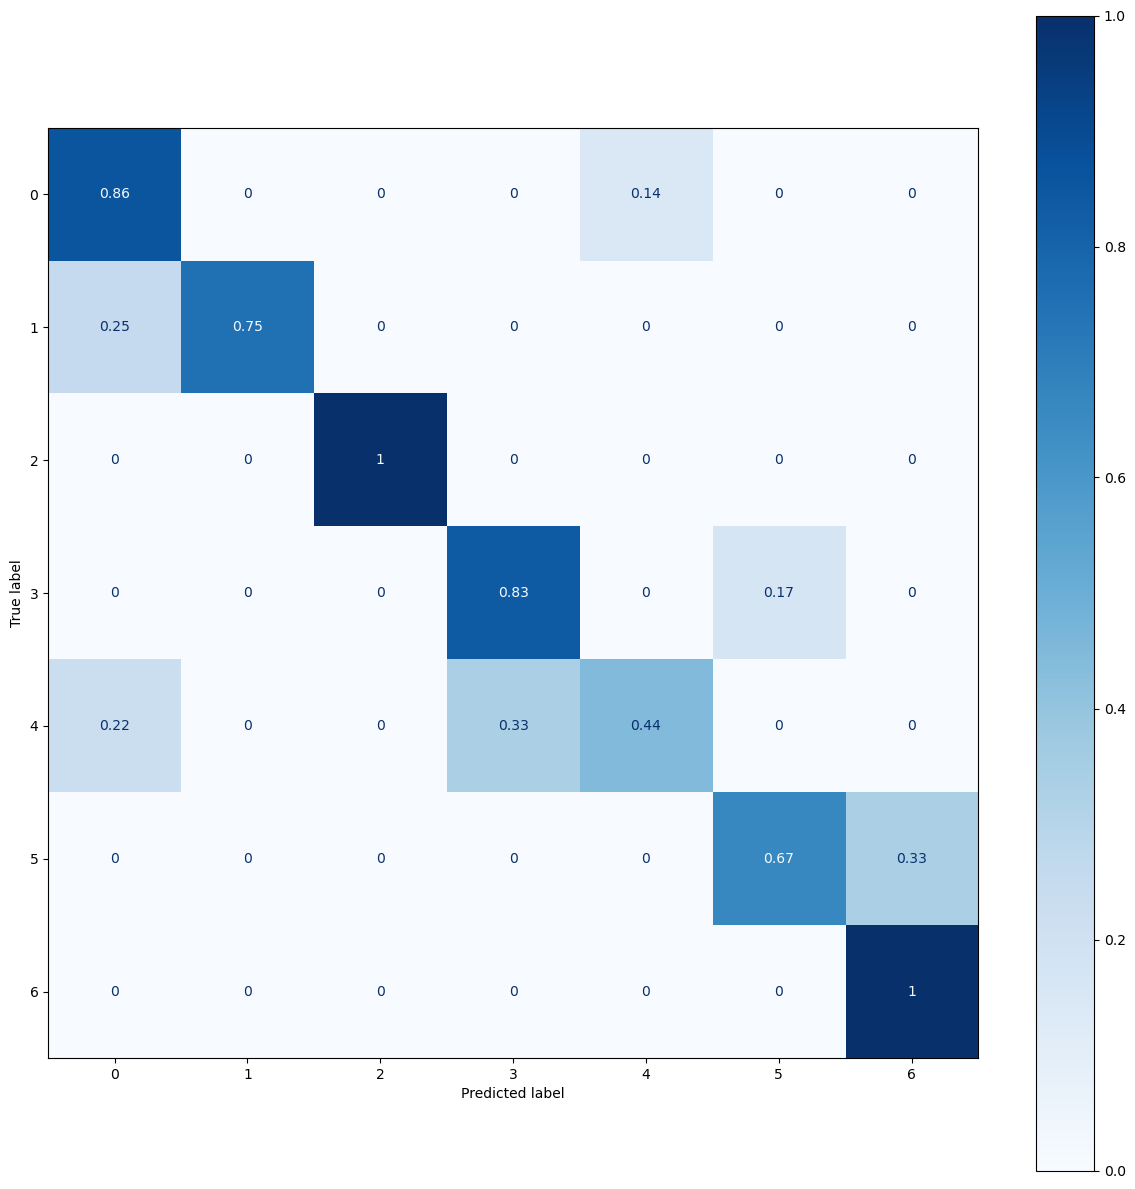

In [34]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(clf, test_images, test_labels, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [35]:
%matplotlib inline

import matplotlib.pyplot as plt
# plt.matshow(cm )
# plt.title('Confusion Matrix', fontsize=24)
# plt.colorbar()
# plt.ylabel('True Label', fontsize=24)
# plt.xlabel('Predicted Label', fontsize=24)
# plt.xticks(ticks=range(0,7), labels=list(emotion_to_int.keys()))
# plt.yticks(ticks=range(0,7), labels=list(emotion_to_int.keys()))
# plt.show()

fig = plt.figure(figsize=(10,10))

# plt.rc('font', size=14)
# plt.rc('axes', labelsize=14, titlesize=14)
# plt.rc('legend', fontsize=14)
# plt.rc('xtick', labelsize=10)
# plt.rc('ytick', labelsize=10)

# plt.rc('font', size=10)
disp = ConfusionMatrixDisplay.from_predictions(test_labels, predicted,
                                        normalize="true", values_format=".0%", cmap="Blues")


NameError: name 'ConfusionMatrixDisplay' is not defined

<Figure size 1000x1000 with 0 Axes>

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))